In [1]:
# The data set basically records the number of covid-19 cases and deaths in every county in the United States from 2020-01-21 to 2020-12-05
# url:https://www.kaggle.com/sudalairajkumar/covid19-in-usa?select=us_counties_covid19_daily.csv
# Question 1: What the plot of number of cases is like for the Middlesex county, MA in this time range? 
# Question 2: What is the total number of cases reported in the United States in 2020-12-05?

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [162]:
#load the data into a pandas dataframe
df = pd.read_csv('us_counties_covid19_daily.csv')
df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
800432,2020-12-05,Sweetwater,Wyoming,56037.0,2098,10.0
800433,2020-12-05,Teton,Wyoming,56039.0,1739,2.0
800434,2020-12-05,Uinta,Wyoming,56041.0,1187,5.0
800435,2020-12-05,Washakie,Wyoming,56043.0,519,8.0


In [163]:
#use pd.describe() to get a rough overview of the data
df.describe()

,fips,cases,deaths
count,792846.000000,800437.000000,783704.000000
mean,31238.198828,1589.667358,48.815309
std,16289.192418,8385.201329,440.482993
min,1001.000000,0.000000,0.000000
25%,18179.000000,29.000000,0.000000
50%,29209.000000,175.000000,3.000000
75%,46097.000000,775.000000,17.000000
max,78030.000000,439538.000000,24346.000000


In [164]:
#print the array of columns and the index array

for col in df.columns:
    print (col, end=' ')
print()
list_of_index = [list(row) for row in df.values]
for i in range(len(list_of_index[0])):
    print(list_of_index[0][i],end=" ")


date county state fips cases deaths 
2020-01-21 Snohomish Washington 53061.0 1 0.0 

In [165]:
df1 = df[(df['county']=='Middlesex')&(df['state']=='Massachusetts')]  
df1


,date,county,state,fips,cases,deaths
556,2020-03-05,Middlesex,Massachusetts,25017.0,1,0.0
616,2020-03-06,Middlesex,Massachusetts,25017.0,1,0.0
702,2020-03-07,Middlesex,Massachusetts,25017.0,5,0.0
804,2020-03-08,Middlesex,Massachusetts,25017.0,10,0.0
928,2020-03-09,Middlesex,Massachusetts,25017.0,15,0.0
...,...,...,...,...,...,...
785443,2020-12-01,Middlesex,Massachusetts,25017.0,46743,2430.0
788688,2020-12-02,Middlesex,Massachusetts,25017.0,47671,2435.0
791934,2020-12-03,Middlesex,Massachusetts,25017.0,48896,2443.0
795180,2020-12-04,Middlesex,Massachusetts,25017.0,50108,2450.0


In [166]:
df1['cases']


556           1
616           1
702           5
804          10
928          15
          ...  
785443    46743
788688    47671
791934    48896
795180    50108
798425    51310
Name: cases, Length: 276, dtype: int64

<AxesSubplot:>

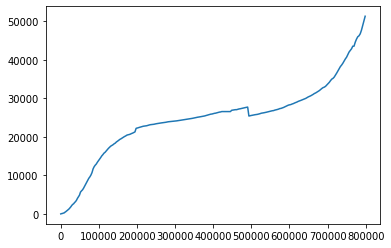

In [167]:
#create some simple plot of part of the data
df1['cases'].plot()

In [168]:
df2 = df[df['state']=='Massachusetts']  
df2

,date,county,state,fips,cases,deaths
44,2020-02-01,Suffolk,Massachusetts,25025.0,1,0.0
52,2020-02-02,Suffolk,Massachusetts,25025.0,1,0.0
60,2020-02-03,Suffolk,Massachusetts,25025.0,1,0.0
68,2020-02-04,Suffolk,Massachusetts,25025.0,1,0.0
76,2020-02-05,Suffolk,Massachusetts,25025.0,1,0.0
...,...,...,...,...,...,...
798427,2020-12-05,Norfolk,Massachusetts,25021.0,17817,1193.0
798428,2020-12-05,Plymouth,Massachusetts,25023.0,16142,911.0
798429,2020-12-05,Suffolk,Massachusetts,25025.0,40045,1273.0
798430,2020-12-05,Unknown,Massachusetts,NaN,9892,6.0


In [171]:
#create a pivot table and plot some data from that pivot table
df3 = pd.pivot_table(df2, 
               values='deaths',
               index=['date'],
               columns=['county'],
              )
df3

county,Barnstable,Berkshire,Bristol,Dukes,Essex,Franklin,Hampden,Hampshire,Middlesex,Nantucket,Norfolk,Plymouth,Suffolk,Unknown,Worcester
date,,,,,,,,,,,,,,,
2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2020-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2020-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,192.0,64.0,862.0,0.0,1460.0,76.0,913.0,163.0,2430.0,2.0,1184.0,896.0,1250.0,6.0,1280.0
2020-12-02,194.0,65.0,868.0,0.0,1467.0,76.0,917.0,164.0,2435.0,2.0,1187.0,902.0,1256.0,6.0,1285.0
2020-12-03,195.0,66.0,873.0,0.0,1475.0,76.0,920.0,165.0,2443.0,2.0,1191.0,906.0,1261.0,6.0,1295.0


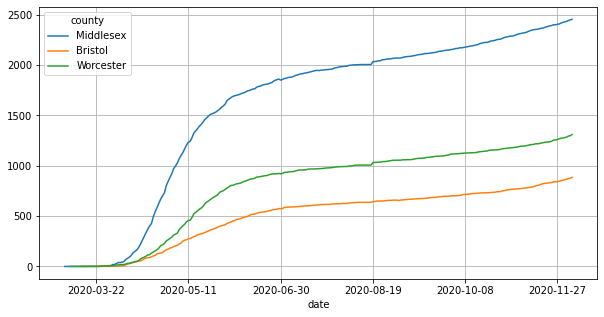

In [172]:
df3[['Middlesex','Bristol','Worcester']].plot(figsize=(10,5))
plt.grid()

In [173]:
#use the groupby feature
df4 = df.groupby(['date']).cases.agg(sum)
df4

date
2020-01-21           1
2020-01-22           1
2020-01-23           1
2020-01-24           2
2020-01-25           3
                ...   
2020-12-01    13799415
2020-12-02    13999749
2020-12-03    14217106
2020-12-04    14446349
2020-12-05    14652044
Name: cases, Length: 320, dtype: int64

<AxesSubplot:xlabel='date'>

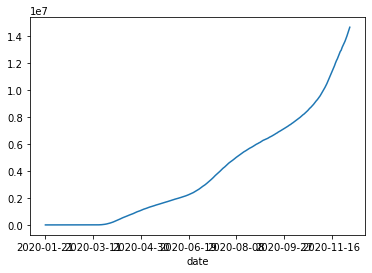

In [174]:
df4.plot()

In [ ]:
#Discussion: 
#Question1: overall, there is an obvious increasing trend in terms of number of cases reported in Middlesex, MA, with an exception that there occurs a slight drop.
#Question2: In 12/05/2020, the total number of cases reported in the United States is 14652044